# Data Analysis

### 1. Load the Data from clean CSV

In [538]:
# Import pandas to extract the data
import pandas as pd

# Import numpy to manipulate the data
import numpy as np

# Import matplotlib for visual analysis
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

# Reset plot style
#lt.rcParams.update(plt.rcParamsDefault)

# Import data from csv
df = pd.read_csv('clean_df.csv', index_col=0, parse_dates=True, dayfirst=True)

# Review the first 5 rows of the dataframe
df.head()

,time,weight,bmi,body_fat,fat_free_body_weight,sub_fat,vis_fat,body_water,ske_muscle,muscle_mass,bone_mass,protein,bmr,age
DATE,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619,38
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.160,9.4,0.522,0.524,118.6,6.6,0.200,1614,38
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615,38
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616,38
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.160,9.4,0.522,0.524,118.5,6.6,0.201,1611,38


### 2. Descriptive Statistical analysis

In [539]:
# Review quick snapshot of data to ensure everything has loaded as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2023-11-01 to 2024-04-05
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  128 non-null    object 
 1   weight                128 non-null    float64
 2   bmi                   128 non-null    float64
 3   body_fat              128 non-null    float64
 4   fat_free_body_weight  128 non-null    float64
 5   sub_fat               128 non-null    float64
 6   vis_fat               128 non-null    float64
 7   body_water            128 non-null    float64
 8   ske_muscle            128 non-null    float64
 9   muscle_mass           128 non-null    float64
 10  bone_mass             128 non-null    float64
 11  protein               128 non-null    float64
 12  bmr                   128 non-null    int64  
 13  age                   128 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 15.0+

In [540]:
# Review basic statistics for the weight column
df['weight'].describe()

count    128.000000
mean     162.307813
std        2.098204
min      158.400000
25%      160.600000
50%      162.200000
75%      163.800000
max      167.400000
Name: weight, dtype: float64

In [541]:
# Review count of weight column values
df['weight'].value_counts()

163.6    7
161.2    6
159.4    6
163.4    6
161.8    5
160.4    5
160.8    5
162.6    5
161.0    5
160.2    5
162.2    5
164.0    5
163.8    4
161.6    4
163.2    4
160.0    4
164.2    4
159.2    4
161.4    4
162.4    3
165.8    3
164.4    3
165.2    3
164.6    3
160.6    2
165.6    2
159.8    2
166.4    2
159.6    2
159.0    1
158.8    1
167.4    1
162.8    1
166.2    1
165.4    1
166.8    1
165.0    1
166.6    1
158.4    1
Name: weight, dtype: int64

### 3. Plot weigh trend over time
#### Line plot

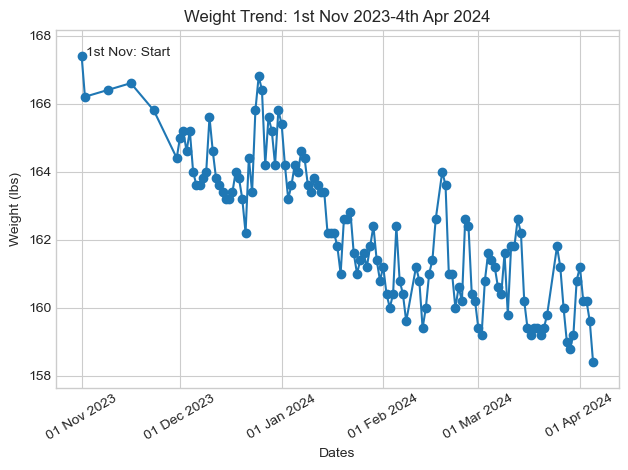

In [555]:
# Define plot style to use
plt.style.use('seaborn-v0_8-whitegrid')

# Use the weight column of the dataframe to plot
plt.plot_date(df.index, df.weight, linestyle='solid')

# Set axis range for the Y axis using min & max values with buffer
plt.ylim(df.weight.min() - 0.75, df.weight.max() + 0.75) 

# Define date format as day, month, year
date_format = mpl_dates.DateFormatter('%d %b %Y')

# Apply date format to the X axis
plt.gca().xaxis.set_major_formatter(date_format)

# Rotate the ticks on the X axis so dates are easier to read
plt.xticks(rotation=30)

# Add plot title and axis labels for context
plt.title('Weight Trend: 1st Nov 2023-4th Apr 2024')
plt.ylabel('Weight (lbs)')
plt.xlabel('Dates')

# Add annotation for start date
plt.text(df.index[0], df.weight.max(), ' 1st Nov: Start')

# Enable tight laytout so padding is consistent
plt.tight_layout()

# Display plot
plt.show()

In [543]:
# TODO: Weight: Month by month plot

# Get each month's data using index, range
# Save as variable
# Plot variable
# Set date format

In [544]:
# TODO: Weight: Day of the week plot mean

In [545]:
# TODO: Weight, body fat, muscle mass area plot

#### Histogram

In [546]:
# Get a list of bin intervals and counts of values
count, bin_edges = np.histogram(df.weight)

# Review frequency of values in each bin interval
print(count)

# Review list of bin intervals
print(bin_edges)

[ 7 19 17 19 14 17 19  5  8  3]
[158.4 159.3 160.2 161.1 162.  162.9 163.8 164.7 165.6 166.5 167.4]


####  Whole time series

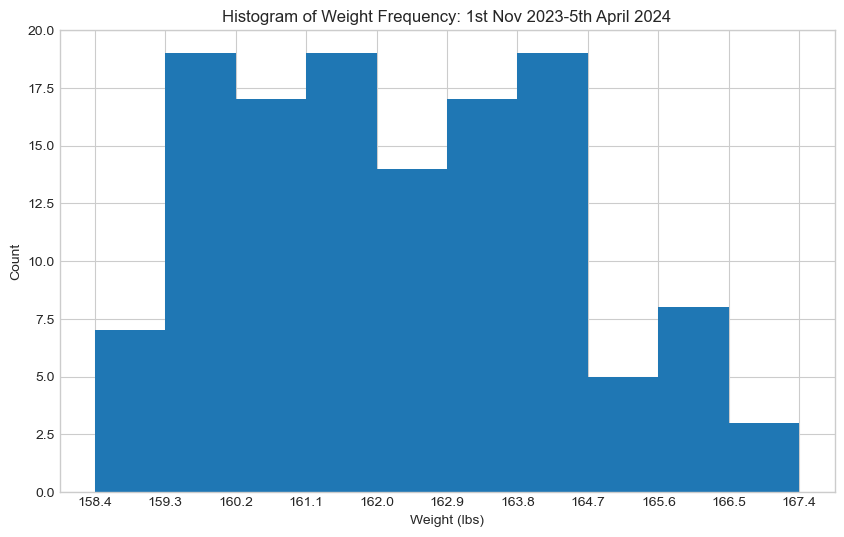

In [547]:
# Plot histogram
df.weight.plot(kind='hist', #Set type of plot as histogram
               figsize=(10,6), # Set height and width
               xticks=bin_edges) # Match x-axis labels with bin intervals
               #yticks= # TODO: Change yticks to integer

# Set axis range for the Y axis
plt.ylim(0, count.max() + 1) # Add buffer in axis range

# Add plot title and axis labels for context
plt.title('Histogram of Weight Frequency: 1st Nov 2023-5th April 2024')
plt.ylabel('Count')
plt.xlabel('Weight (lbs)')

# TODO: Add value label
# for index, value in enumerate(bin_edges):
#     label = format(int(value))
#     plt.annotate(label, xy=(value, index), color='black')

# Display plot
plt.show()

In [548]:
# TODO: Weight: Month vs month sub plot

# fig = plt.figure(figsize=(6, 6))

# axs1 = fig.add_subplot(2, 2, 1)
# axs1.plot(total_immigrants)
# axs1.set_title("Line plot on immigrants")

# axs2 = fig.add_subplot(2, 2, 2)
# axs2.barh(total_immigrants.index, total_immigrants)
# axs2.set_title("Bar plot on immigrants")

# axs3 = fig.add_subplot(2, 2, 3)
# axs3.plot(total_immigrants)
# axs3.set_title("Line plot on immigrants 2x2")

# axs4 = fig.add_subplot(2, 2, 4)
# axs4.plot(total_immigrants)
# axs4.set_title("Line plot on immigrants 2x2")

# fig.tight_layout()

# plt.show()

In [549]:
# TODO: Weight: Day of the week plot

In [550]:
# TODO: Get mean weight for each month
# df.weight.resample('M').mean()

In [551]:
# # Review basic statistics for object variables
# df.describe(include=['object'])

In [552]:
# # Create a scatter plot of CPU_frequency and price columns
# sns.regplot(x="CPU_frequency", y="Price", data=df)
# plt.ylim(0,)

In [553]:
# # Find the correlation between CPU_frequency and price columns
# df[["CPU_frequency", "Price"]].corr()

In [554]:
# # Create a box plot to look at the relationship between category and price
# sns.boxplot(x="Category", y="Price", data=df)